# Error function based solutions

## The solution 

$$T=T_i - \left(\frac{2q\sqrt{\alpha}}{k}\right) \left[ \sqrt{t}\:\rm{ierfc} \left(\frac{z}{2\sqrt{\alpha t}}\right)-S\sqrt{t-\tau}\:\rm{ierfc}\left(\frac{z}{2\sqrt{\alpha(t-\tau)}}\right)\right] $$

$T_i$ -Pre-heat temperature <br>
$\alpha$ -Thermal Diffusivity <br>
$q$ -Heat Flux <br>
$\tau$ -Pulse time


## Integral of complementary error function

$$\rm{ierfc} (z)= -z \:\rm{erfc}(z) + \frac{e^{-z^2}}{\sqrt{\pi}}$$

## Complementary error function equation

$$\rm{erfc}(z)=1-\rm{erf}(z)$$

## Error function equation

$$\rm{erf}(z)= \frac{2}{\sqrt{\pi}} \int_{0}^{z}\exp({-t^2})dt$$


In [1]:
#Import the necessary packages

import numpy as np
from scipy import special
import matplotlib.pyplot as plt

In [2]:
def ierfc(z):
    ans=-z*special.erfc(z) + np.exp(-z*z)/np.sqrt(np.pi)
    return ans

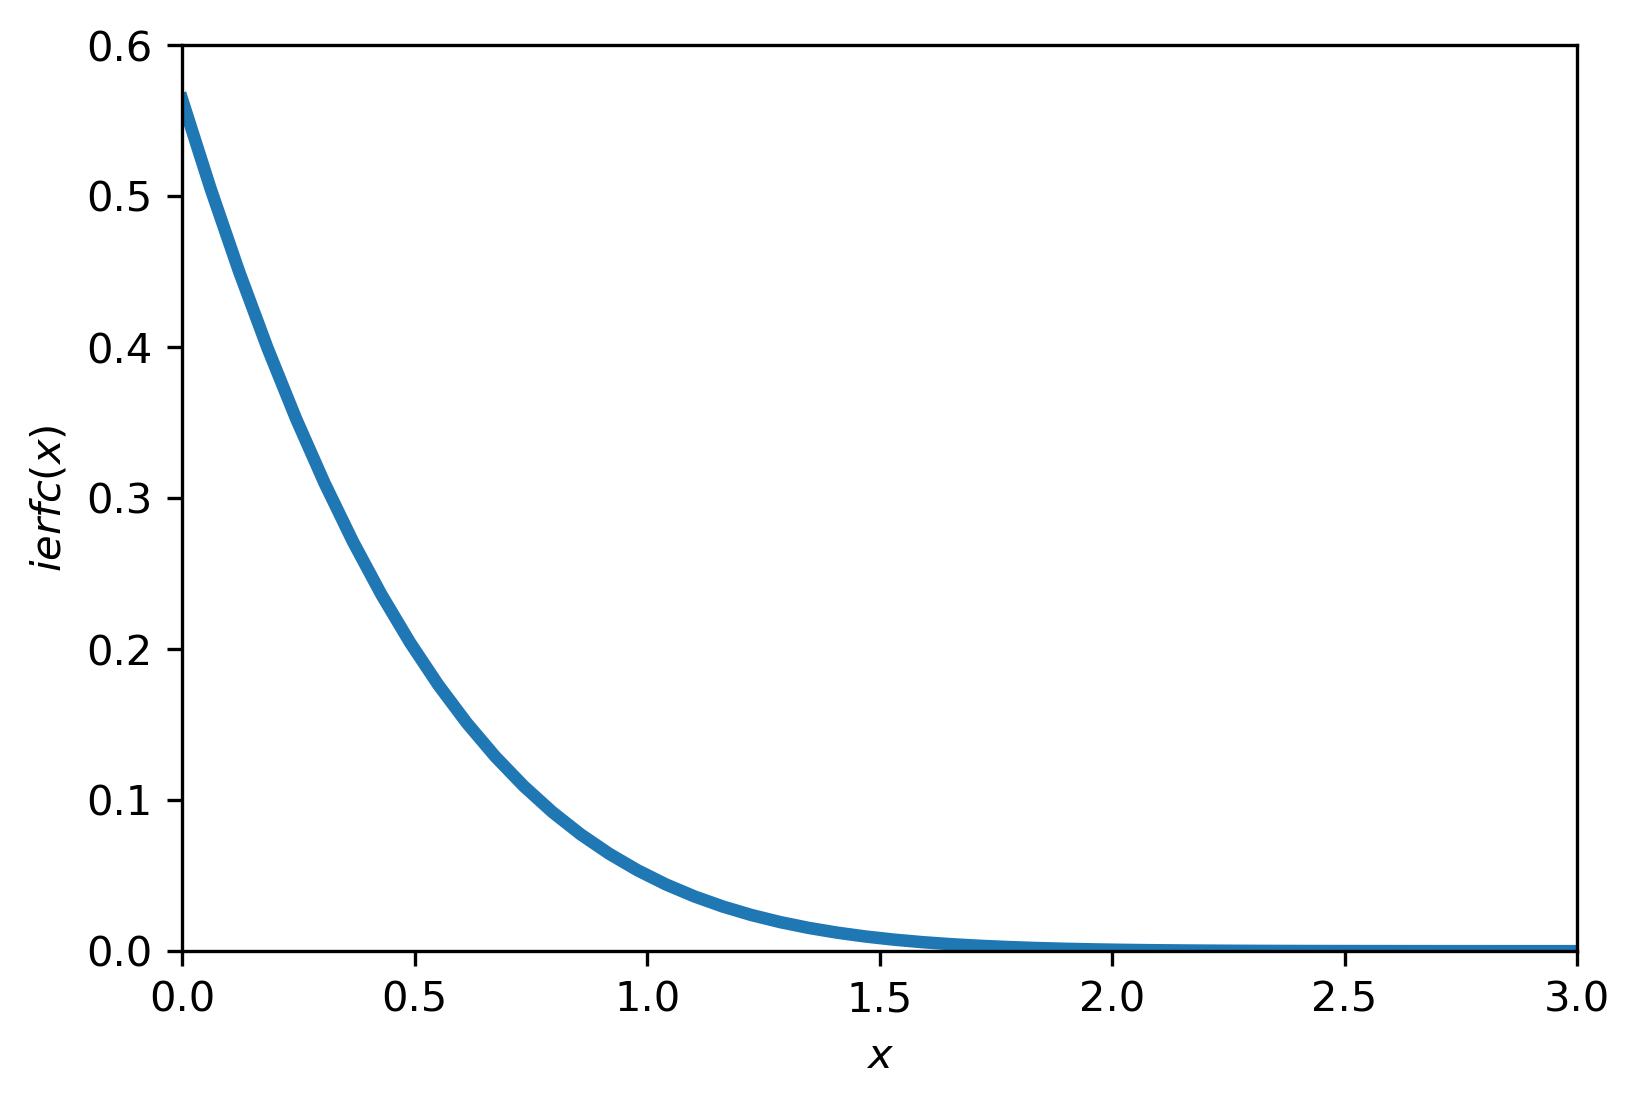

In [3]:
# Visualize the ierfc function
x = np.linspace(0, 3)


plt.plot(x, ierfc(x),linewidth='3')

plt.ylim(0,0.6)
plt.xlim(0,3)
plt.xlabel('$x$')
plt.ylabel('$ierfc(x)$')
plt.gcf().set_dpi(300)
plt.show()

In [4]:
def Tfunc(t,z,tau,a):
    f1=np.zeros(len(t))
    f2=np.zeros(len(t))
    for i in range(len(t)):
        f1[i]=(np.sqrt(t[i])*ierfc(np.divide(z,2*np.sqrt(a*t[i]))))
        if t[i]>tau:
            f2[i]=np.sqrt(t[i]-tau)*ierfc(np.divide(z,(2*np.sqrt(a*(t[i]-tau)))))  
    return f1-f2

In [5]:
#Data and setup
a=8.5e-5
q=2E7
k=85
Ti=298
t=np.linspace(0.001,5,50)

In [6]:
#Short Pulse
tau=0.1

In [7]:
# Surface
Tsurface=Ti+(2*q*np.sqrt(a)/k)*Tfunc(t,1e-6,tau,a)
# 1mm below
Tb1=Ti+(2*q*np.sqrt(a)/k)*Tfunc(t,1e-3,tau,a)
# 5mm below
Tb2=Ti+(2*q*np.sqrt(a)/k)*Tfunc(t,5e-3,tau,a)

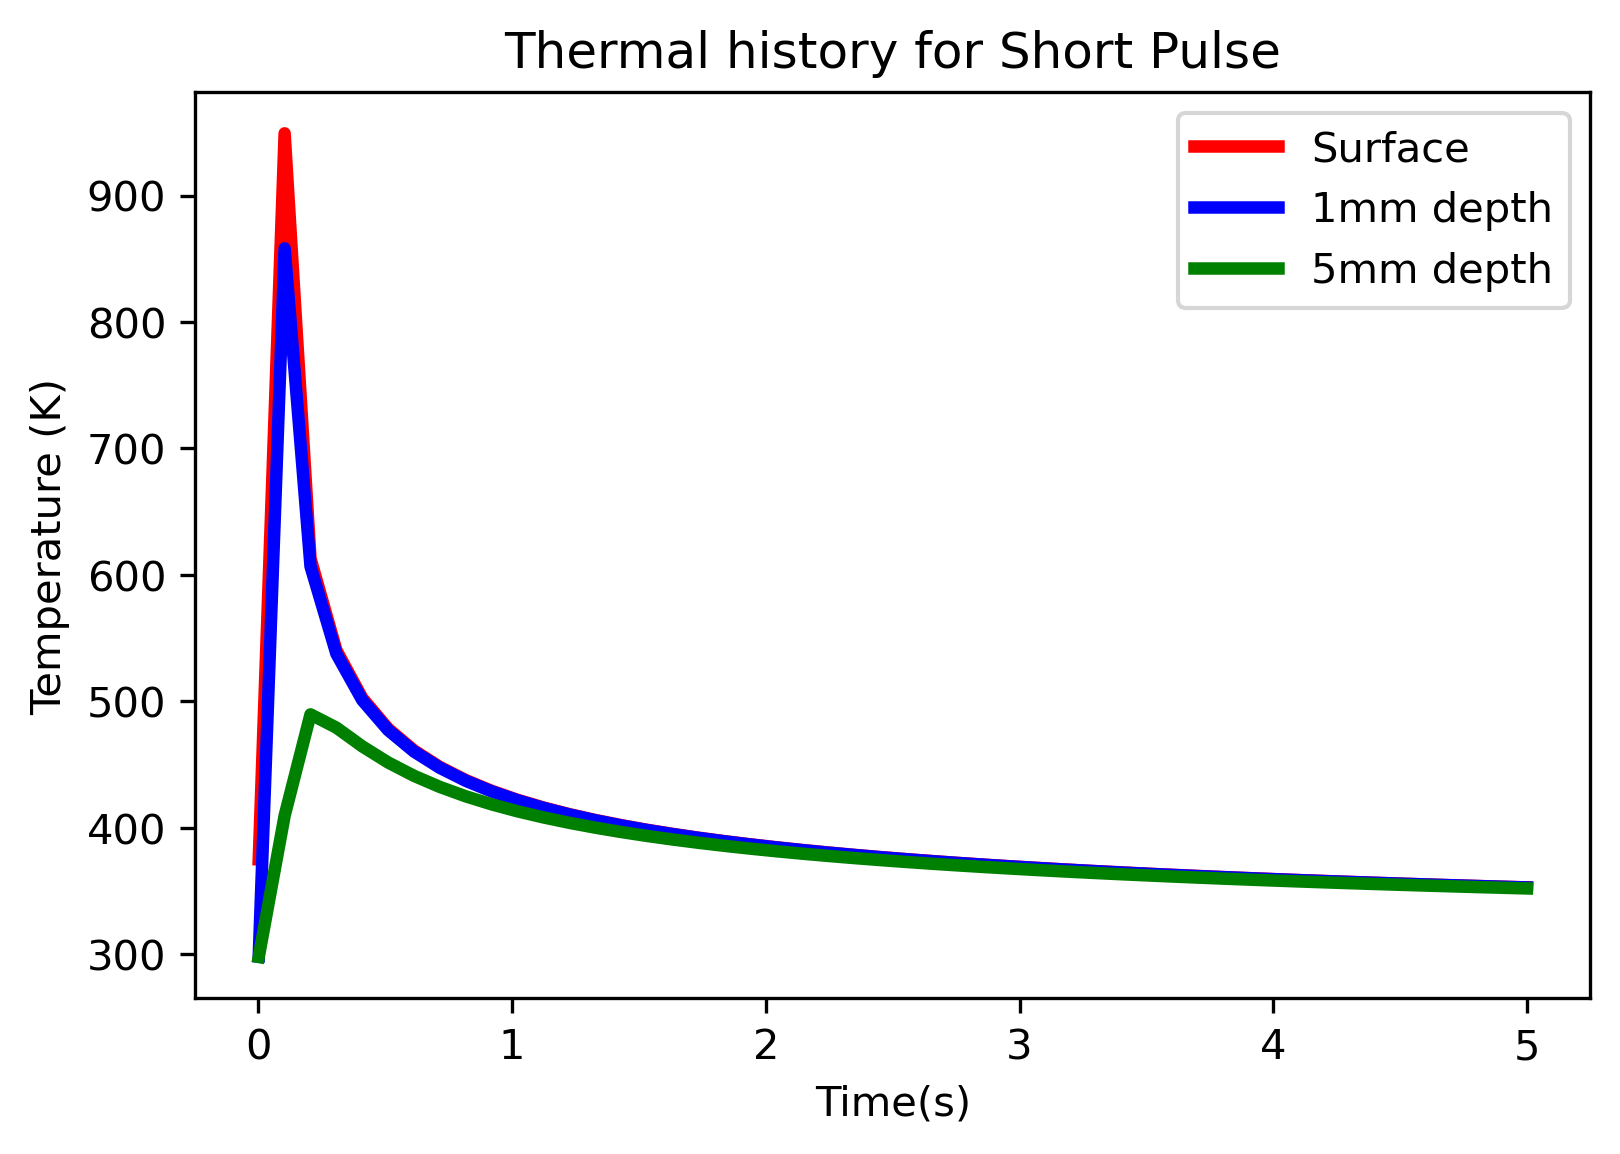

In [8]:
plt.plot(t,Tsurface,'r-',linewidth='3',label="Surface")
plt.plot(t,Tb1,'b-',linewidth='3',label="1mm depth")
plt.plot(t,Tb2,'g-',linewidth='3',label="5mm depth")
plt.legend()
plt.xlabel("Time(s)")
plt.ylabel("Temperature (K)")
plt.title("Thermal history for Short Pulse")
plt.gcf().set_dpi(300)
plt.show()

In [9]:
#Long Pulse
tau=1.0

In [10]:
# Surface
Tsurface=Ti+(2*q*np.sqrt(a)/k)*Tfunc(t,1e-6,tau,a)
# 1mm below
Tb1=Ti+(2*q*np.sqrt(a)/k)*Tfunc(t,1e-3,tau,a)
# 5mm below
Tb2=Ti+(2*q*np.sqrt(a)/k)*Tfunc(t,5e-3,tau,a)

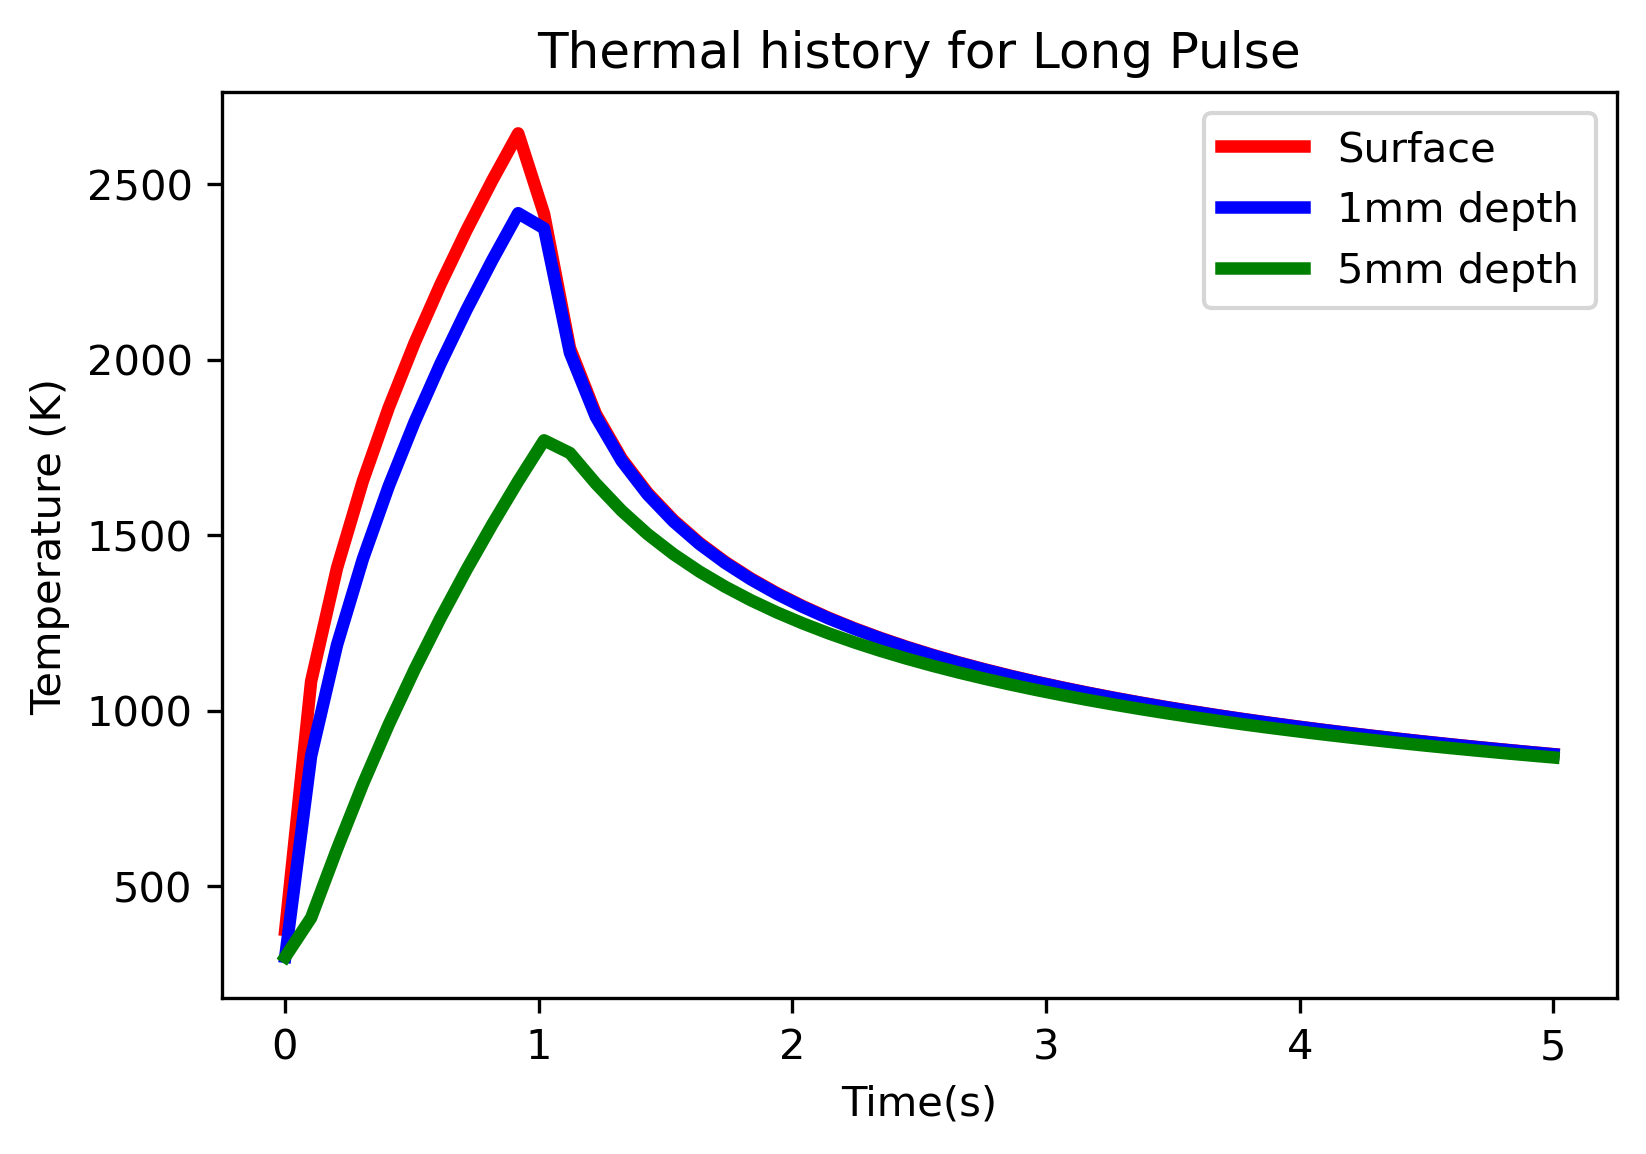

In [11]:
plt.plot(t,Tsurface,'r-',linewidth='3',label="Surface")
plt.plot(t,Tb1,'b-',linewidth='3',label="1mm depth")
plt.plot(t,Tb2,'g-',linewidth='3',label="5mm depth")
plt.legend()
plt.xlabel("Time(s)")
plt.ylabel("Temperature (K)")
plt.title("Thermal history for Long Pulse")
plt.gcf().set_dpi(300)
plt.show()